In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [68]:
df_brl = pd.read_csv(r"C:\Users\FilipeCampos\Desktop\data\BRL=X.csv")
df_bvsp = pd.read_csv(r"C:\Users\FilipeCampos\Desktop\data\^BVSP.csv")
df_gol = pd.read_csv(r"C:\Users\FilipeCampos\Desktop\data\GOLL4.SA.csv")
df_ouro = pd.read_csv(r"C:\Users\FilipeCampos\Desktop\data\Ouro Tratado.csv")
df_petroleo = pd.read_csv(r"C:\Users\FilipeCampos\Desktop\data\Petroleo Tratado.csv")

In [69]:
df_brl = df_brl.drop([0], axis = 0)
df_brl = df_brl.drop([998], axis = 0)

In [44]:
df_brl['Date'] = pd.to_datetime(df_brl['Date'])

,Date,Open,High,Low,Close,Adj Close,Volume
1,2020-01-02,4.0163,4.038700,4.000820,4.0163,4.0163,0
2,2020-01-03,4.0237,4.067005,4.021125,4.0234,4.0234,0
3,2020-01-06,4.0570,4.066200,4.044942,4.0570,4.0570,0
4,2020-01-07,4.0605,4.090600,4.043024,4.0604,4.0604,0
5,2020-01-08,4.0662,4.076400,4.044100,4.0662,4.0662,0
...,...,...,...,...,...,...,...
993,2023-10-23,5.0313,5.049709,4.999201,5.0313,5.0313,0
994,2023-10-24,5.0123,5.026100,4.971456,5.0123,5.0123,0
995,2023-10-25,4.9910,5.016500,4.985900,4.9910,4.9910,0
996,2023-10-26,4.9947,5.014800,4.986613,4.9947,4.9947,0


In [45]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 1 to 997
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       997 non-null    datetime64[ns]
 1   Open       997 non-null    float64       
 2   High       997 non-null    float64       
 3   Low        997 non-null    float64       
 4   Close      997 non-null    float64       
 5   Adj Close  997 non-null    float64       
 6   Volume     997 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.7 KB


In [47]:
df_bvsp['Date'] = pd.to_datetime(df_bvsp['Date'])
df_bvsp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
1,2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2,2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
3,2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
4,2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...,...
947,2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800
948,2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800
949,2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500
950,2023-10-26,112840.0,114886.0,112840.0,114777.0,114777.0,12770600


In [49]:
df_gol['Date'] = pd.to_datetime(df_gol['Date'])
df_gol

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,36.680000,37.240002,36.599998,37.169998,37.169998,2319400
1,2020-01-03,36.000000,36.450001,35.590000,35.900002,35.900002,4342600
2,2020-01-06,35.500000,35.500000,34.200001,34.250000,34.250000,6271300
3,2020-01-07,34.650002,34.840000,34.209999,34.450001,34.450001,3310300
4,2020-01-08,34.610001,36.299999,34.610001,35.810001,35.810001,7156200
...,...,...,...,...,...,...,...
947,2023-10-23,6.850000,7.440000,6.810000,7.280000,7.280000,12412000
948,2023-10-24,7.370000,7.580000,7.370000,7.480000,7.480000,9631800
949,2023-10-25,7.510000,7.700000,7.400000,7.600000,7.600000,12485500
950,2023-10-26,7.600000,8.230000,7.530000,8.230000,8.230000,15446500


In [70]:
df_ouro['Data'] = df_ouro['Data'].astype(str)  # Convertendo para string

# Adicionando zeros à esquerda para garantir que todos os valores tenham 8 dígitos
df_ouro['Data'] = df_ouro['Data'].str.zfill(8)

# Convertendo para o tipo datetime
df_ouro['Data'] = pd.to_datetime(df_ouro['Data'], format='%d%m%Y', errors='coerce')

# Invertendo a ordem das datas
df_ouro = df_ouro.sort_values(by='Data', ascending=True)

# Reformatando as datas para o formato desejado
df_ouro['Data'] = df_ouro['Data'].dt.strftime('%Y-%m-%d')

df_ouro= df_ouro.drop([0,1], axis = 0)

df_ouro.rename(columns={'Data': 'Date', 'Ultimo': 'Close'}, inplace=True)
# Exibindo o DataFrame resultante
df_ouro

,Date,Close,Abertura,Maxima,Minima,Vol.,Var%
997,2020-01-02,1528.1,1521.0,1534.0,1519.7,270.55K,0.0033
996,2020-01-03,1552.4,1531.7,1556.6,1530.4,436.74K,0.0159
995,2020-01-06,1568.8,1562.7,1590.9,1562.3,558.97K,0.0106
994,2020-01-07,1574.3,1567.4,1579.2,1557.0,435.87K,0.0035
993,2020-01-08,1560.2,1578.8,1613.3,1553.4,813.41K,-0.0090
...,...,...,...,...,...,...,...
6,2023-10-23,1978.2,1977.9,1983.1,1963.6,0.45K,-0.0081
5,2023-10-24,1976.8,1975.1,1980.3,1958.3,1.23K,-0.0007
4,2023-10-25,1985.5,1972.0,1988.8,1971.0,0.16K,0.0044
3,2023-10-26,1987.9,1981.6,1992.5,1974.4,0.20K,0.0012


In [71]:
df_petroleo['Data'] = df_petroleo['Data'].astype(str)  # Convertendo para string

# Adicionando zeros à esquerda para garantir que todos os valores tenham 8 dígitos
df_petroleo['Data'] = df_petroleo['Data'].str.zfill(8)

# Convertendo para o tipo datetime
df_petroleo['Data'] = pd.to_datetime(df_petroleo['Data'], format='%d%m%Y', errors='coerce')

# Invertendo a ordem das datas
df_petroleo = df_petroleo.sort_values(by='Data', ascending=True)

# Reformatando as datas para o formato desejado
df_petroleo['Data'] = df_petroleo['Data'].dt.strftime('%Y-%m-%d')

df_petroleo.rename(columns={'Data': 'Date', 'Ultimo': 'Close'}, inplace=True)
df_petroleo= df_petroleo.drop([1014,0,1], axis = 0)
# Exibindo o DataFrame resultante
df_petroleo

,Date,Close,Abertura,Maxima,Minima,Vol.,Var%
1013,2020-01-02,61.18,61.60,61.60,60.64,486.87K,-0.0024
1012,2020-01-03,63.05,61.18,64.09,61.13,885.86K,0.0306
1011,2020-01-06,63.27,63.71,64.72,62.64,724.24K,0.0035
1010,2020-01-07,62.70,62.91,63.15,62.11,582.65K,-0.0090
1009,2020-01-08,59.61,62.84,65.65,59.15,1.21M,-0.0493
...,...,...,...,...,...,...,...
6,2023-10-23,85.49,88.00,88.29,85.35,315.52K,-0.0367
5,2023-10-24,83.74,86.15,86.30,82.94,370.59K,-0.0205
4,2023-10-25,85.39,83.69,85.56,82.08,429.46K,0.0197
3,2023-10-26,83.21,85.37,85.59,82.56,341.79K,-0.0255


In [82]:
print("Tamanho original:")
print(df_gol.shape, df_petroleo.shape, df_brl.shape, df_bvsp.shape, df_ouro.shape)

Tamanho original:
(952, 7) (1012, 7) (997, 7) (952, 7) (996, 7)


In [95]:

dfs = [df_brl, df_bvsp, df_gol, df_ouro, df_petroleo]

for df in dfs:
    # Renomear as colunas
    df.rename(columns={
        'Data': 'Date',
        'Close': 'Close',
        'Abertura': 'Open',
        'Maxima': 'High',
        'Minima': 'Low',
        'Vol.': 'Volume',
        'Var%': 'Var%'
    }, inplace=True)

    # Converter todas as colunas, exceto 'Date', para numérico
    numeric_columns = df.columns.difference(['Date'])
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Exemplo de visualização de um dos dataframes após a modificação
print(df_ouro.head())

           Date   Close    Open    High     Low  Volume    Var%
997  2020-01-02  1528.1  1521.0  1534.0  1519.7     NaN  0.0033
996  2020-01-03  1552.4  1531.7  1556.6  1530.4     NaN  0.0159
995  2020-01-06  1568.8  1562.7  1590.9  1562.3     NaN  0.0106
994  2020-01-07  1574.3  1567.4  1579.2  1557.0     NaN  0.0035
993  2020-01-08  1560.2  1578.8  1613.3  1553.4     NaN -0.0090


In [217]:
dfs = [df_brl, df_bvsp, df_gol, df_ouro, df_petroleo]

In [223]:
dfs_ajustados = [df.head(952) for df in dfs]
dfs_ajustados = [df.set_index('Date') for df in dfs_ajustados]
dfs_close = [df['Close'].rename(f'Close_{i+1}') for i, df in enumerate(dfs_ajustados)]
dfs_close = [df['Close'].rename(f'Close_{df_name}') for df, df_name in zip(dfs_ajustados, ['brl', 'bvsp', 'gol', 'ouro', 'petroleo'])]

# Concatenar os DataFrames de 'Close' ao longo do eixo das colunas
df_concatenado = pd.concat(dfs_close, axis=1)


In [224]:
df_concatenado = df_concatenado.apply(lambda col: col.fillna(col.mean()))


In [225]:
# Arredondar e formatar a coluna 'Close' para exibir até 2 casas decimais
df_concatenado['Close_bvsp'] = df_concatenado['Close_bvsp'].round(2).astype(str)

In [226]:
df_concatenado['Close_bvsp'] = df_concatenado['Close_bvsp'].astype(float)

In [233]:
df_concatenado

,Close_brl,Close_bvsp,Close_gol,Close_ouro,Close_petroleo
Date,,,,,
2020-01-02,4.016300,118573.00,37.169998,1528.100000,61.18
2020-01-03,4.023400,117707.00,35.900002,1552.400000,63.05
2020-01-06,4.057000,116878.00,34.250000,1568.800000,63.27
2020-01-07,4.060400,116662.00,34.450001,1574.300000,62.70
2020-01-08,4.066200,116247.00,35.810001,1560.200000,59.61
...,...,...,...,...,...
2022-05-29,5.197613,109159.02,15.831187,1821.536029,115.61
2022-06-19,5.197613,109159.02,15.831187,1821.536029,108.94
2022-07-03,5.197613,109159.02,15.831187,1821.536029,108.19


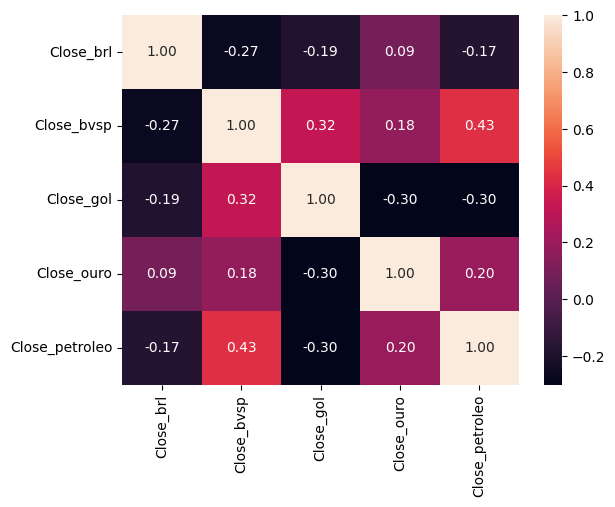

In [238]:
matrix = sns.heatmap(df_concatenado.corr(), annot=True, fmt='.2f', cmap='rocket')

Mean Squared Error (MSE): 29.09120648497648
Mean Absolute Error (MAE): 4.646299512470517
Root Mean Squared Error (RMSE): 5.393626468803386
R2 Score: 0.3875738929562804


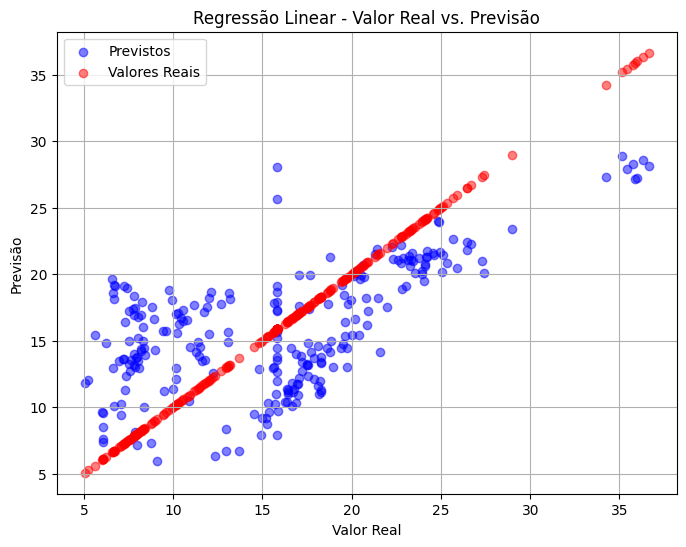

In [214]:
# Separar as características (X) e o alvo (y)
X = df_concatenado[['Close_brl', 'Close_bvsp', 'Close_ouro', 'Close_petroleo']]
y = df_concatenado['Close_gol']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
previsoes = modelo.predict(X_test)

mse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, previsoes)

# Exibir as métricas de avaliação
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')
def plot_scatter(y_true, y_pred, model_name, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color=color, label='Previstos', alpha=0.5)
    plt.scatter(y_true, y_true, color='red', label='Valores Reais', alpha=0.5)
    plt.xlabel('Valor Real')
    plt.ylabel('Previsão')
    plt.title(f'{model_name} - Valor Real vs. Previsão')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotar o gráfico
plot_scatter(y_test, previsoes, 'Regressão Linear', 'blue')

In [211]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 2020-01-02 to 2022-12-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close_brl       1016 non-null   float64
 1   Close_bvsp      1016 non-null   object 
 2   Close_gol       1016 non-null   float64
 3   Close_ouro      1016 non-null   float64
 4   Close_petroleo  1016 non-null   float64
dtypes: float64(4), object(1)
memory usage: 79.9+ KB


Random Forest Metrics:
Mean Squared Error (MSE): 2.435506858777283
Mean Absolute Error (MAE): 0.9800580394711502
Root Mean Squared Error (RMSE): 1.5606110530100967
R2 Score: 0.9487278746940407

XGBoost Metrics:
Mean Squared Error (MSE): 2.516751857607778
Mean Absolute Error (MAE): 1.0670831416554796
Root Mean Squared Error (RMSE): 1.5864273880665885
R2 Score: 0.9470175104856595


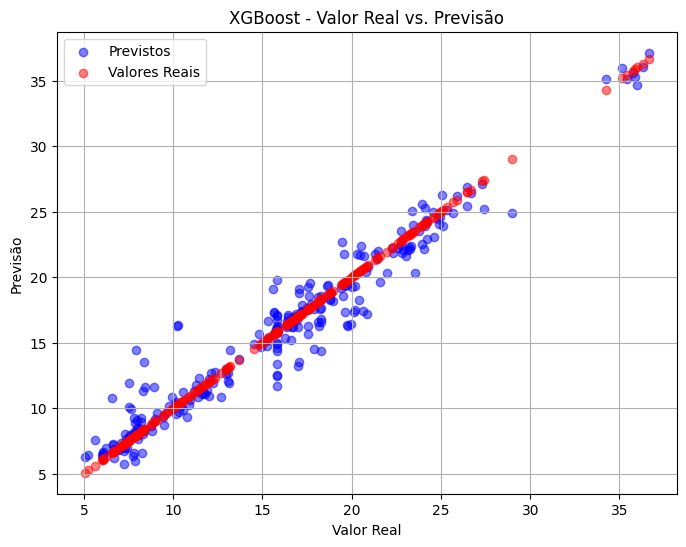

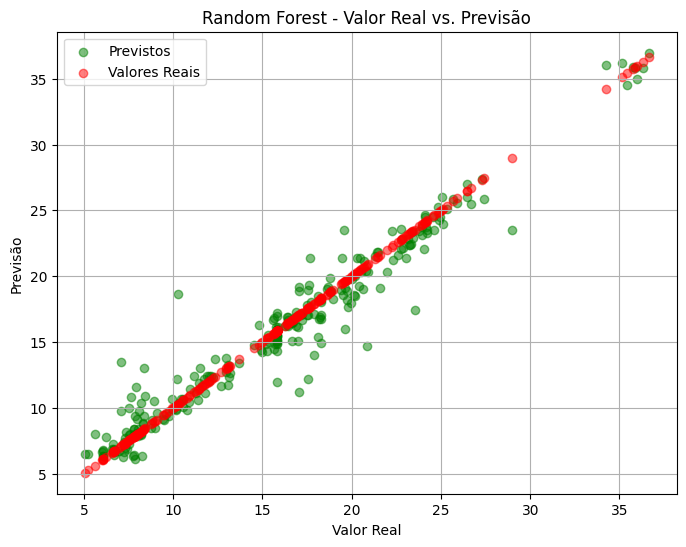

In [235]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Supondo que df seja o DataFrame que você forneceu

# Separar as características (X) e o alvo (y)
X = df_concatenado[['Close_brl', 'Close_bvsp', 'Close_ouro', 'Close_petroleo']]
y = df_concatenado['Close_gol']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
rf_predictions = rf_model.predict(X_test)

# Avaliar o modelo Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse}')
print(f'R2 Score: {rf_r2}')

# Treinar o modelo XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
xgb_predictions = xgb_model.predict(X_test)

# Avaliar o modelo XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Metrics:")
print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'Mean Absolute Error (MAE): {xgb_mae}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')
print(f'R2 Score: {xgb_r2}')

def plot_scatter(y_true, y_pred, model_name, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color=color, label='Previstos', alpha=0.5)
    plt.scatter(y_true, y_true, color='red', label='Valores Reais', alpha=0.5)
    plt.xlabel('Valor Real')
    plt.ylabel('Previsão')
    plt.title(f'{model_name} - Valor Real vs. Previsão')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotar o gráfico
plot_scatter(y_test, xgb_predictions, 'XGBoost', 'blue')
plot_scatter(y_test, rf_predictions, 'Random Forest', 'green')